<a href="https://colab.research.google.com/github/varsha595/QUANTUM-COMPUTING-PROJECT/blob/main/4qubit_grovers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U qiskit qiskit-aer matplotlib pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00


✅ Installation complete! Running Grover's algorithm...



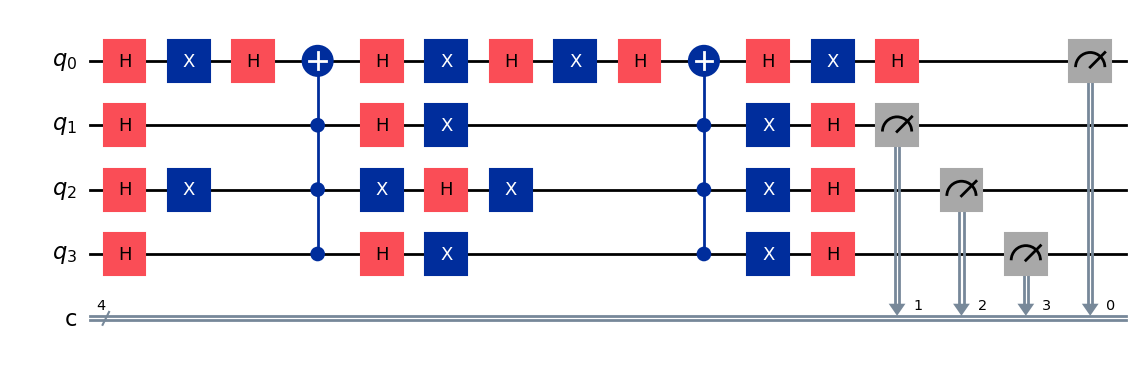

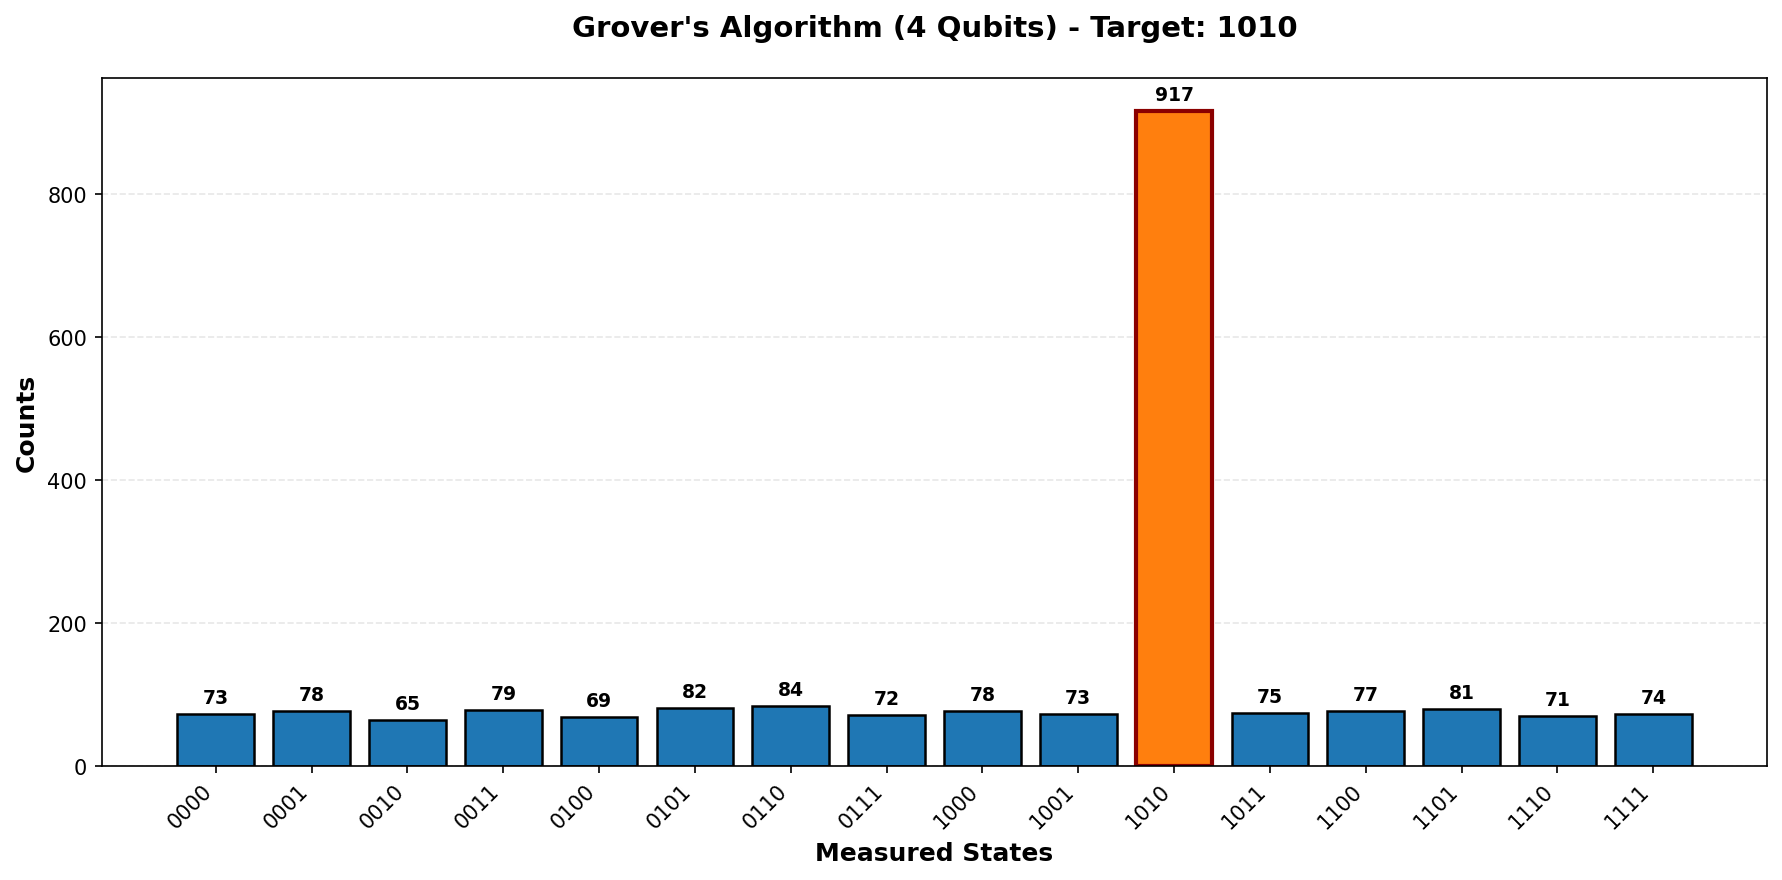


TARGET STATE: 1010

Measurement Results:
  0000:   73 ( 3.56%)
  0001:   78 ( 3.81%)
  0010:   65 ( 3.17%)
  0011:   79 ( 3.86%)
  0100:   69 ( 3.37%)
  0101:   82 ( 4.00%)
  0110:   84 ( 4.10%)
  0111:   72 ( 3.52%)
  1000:   78 ( 3.81%)
  1001:   73 ( 3.56%)
  1010:  917 (44.78%) ← TARGET
  1011:   75 ( 3.66%)
  1100:   77 ( 3.76%)
  1101:   81 ( 3.96%)
  1110:   71 ( 3.47%)
  1111:   74 ( 3.61%)

Total shots: 2048
Success probability: 44.78%



In [ ]:
# --- STEP 1: Install dependencies (run this first!) ---
!pip install -U qiskit qiskit-aer matplotlib pylatexenc --quiet

print("✅ Installation complete! Running Grover's algorithm...\n")

# --- STEP 2: Import libraries ---
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import Image, display

# --- STEP 3: Define 4-qubit Grover circuit ---
def grover_4_qubit(target='1010'):
    qc = QuantumCircuit(4, 4)

    # Step 1: Superposition
    qc.h(range(4))

    # Step 2: Oracle (mark target state)
    for i, bit in enumerate(target):
        if bit == '0':
            qc.x(i)

    qc.h(3)
    qc.mcx([0,1,2], 3)  # multi-controlled X gate (controls = 0,1,2; target = 3)
    qc.h(3)

    for i, bit in enumerate(target):
        if bit == '0':
            qc.x(i)

    # Step 3: Diffusion operator (inversion about mean)
    qc.h(range(4))
    qc.x(range(4))
    qc.h(3)
    qc.mcx([0,1,2], 3)
    qc.h(3)
    qc.x(range(4))
    qc.h(range(4))

    # Match IBM bit order (leftmost qubit = MSB)
    qc = qc.reverse_bits()

    # Step 4: Measurement
    qc.measure(range(4), range(4))

    return qc


# --- STEP 4: Create the circuit ---
target_state = '1010'  # Change this to any 4-bit state you want
qc = grover_4_qubit(target_state)

# --- STEP 5: Save and show the circuit diagram ---
circuit_path = "/content/grover4_circuit.png"
qc.draw('mpl').savefig(circuit_path, bbox_inches='tight')
display(Image(circuit_path))

# --- STEP 6: Simulate ---
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=2048).result()
counts = result.get_counts()

# --- STEP 7: Enhanced histogram with styling ---
fig, ax = plt.subplots(figsize=(12, 6))

# Sort counts by state value
sorted_counts = dict(sorted(counts.items()))

# Create bar plot
states = list(sorted_counts.keys())
values = list(sorted_counts.values())
bars = ax.bar(states, values, color='#1f77b4', edgecolor='black', linewidth=1.2)

# Highlight the target state
target_index = states.index(target_state) if target_state in states else -1
if target_index >= 0:
    bars[target_index].set_color('#ff7f0e')
    bars[target_index].set_edgecolor('darkred')
    bars[target_index].set_linewidth(2)

# Styling
ax.set_xlabel('Measured States', fontsize=12, fontweight='bold')
ax.set_ylabel('Counts', fontsize=12, fontweight='bold')
ax.set_title(f'Grover\'s Algorithm (4 Qubits) - Target: {target_state}',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add count labels on top of bars
for i, (state, count) in enumerate(zip(states, values)):
    ax.text(i, count + max(values)*0.01, str(count),
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()

# Save and display
hist_path = "/content/grover4_histogram.png"
plt.savefig(hist_path, dpi=150, bbox_inches='tight')
display(Image(hist_path))
plt.close()

# --- STEP 8: Print results ---
print(f"\n{'='*50}")
print(f"TARGET STATE: {target_state}")
print(f"{'='*50}")
print(f"\nMeasurement Results:")
for state, count in sorted_counts.items():
    percentage = (count / 2048) * 100
    marker = " ← TARGET" if state == target_state else ""
    print(f"  {state}: {count:4d} ({percentage:5.2f}%){marker}")
print(f"\n{'='*50}")
print(f"Total shots: 2048")
print(f"Success probability: {counts.get(target_state, 0)/2048*100:.2f}%")
print(f"{'='*50}\n")